| **№**           | **Задача**      |                       **Подзадача**                     | **Стадия** |
| ----------- |:-----------| :-----------|:-----------:|
| 1           | **Выбор датасета**                                     | -       | ✔ |
| 2         | **Исследование и прототипирование в Jupyter Notebook**|2.1 Исследование, предобработка, визуализация данных | ✔ |
|             |                                                      | 2.2 Feature Engineering | ✓ |
|             |                                                   | 2.3 Прототип модели, ее обучение и тестирование | ✓ |
| 3           | **Разработка модели и валидация**                      | 3.1 Кросс-валидация | В работе |
|             |                                                    | 3.2 Настройка гиперпараметров             | В работе |
|             |                                                    | 3.3 Окончательная версия модели| В работе |
| 4           | **Развертывание модели с FastAPI**                     | 4.1 Создание веб-сервиса с FastAPI | - |
| 5           | **Контейнеризация с Docker**                           | 5.1 Docker-контейнер | - |
|             |                                                    | 5.2 Dockerfile       | - |
| 6           | **Размещение на Github и документация**                | 6.1 Размещение на GitHub | - |
|             |                                                    | 6.2 README.md файл       | - |
|             |                                                    |6.3  Инструкция с развертыванием веб-сервиса       | - |
|             |                                                    | 6.4 Примеры запросов к API       | - |

В данной работе выбран датасет **CIFAR-100 Python**, который представляет собой коллекцию картинок для тренировки алгоритмов компьютерного зрения.  

[Ссылка на датасет] (https://www.kaggle.com/datasets/fedesoriano/cifar100/data)  

Задача заключается в том, чтобы распознать ***группу*** изображения на картинке, т.е. предполагается задача мультиклассификации.

# 1 Выбор датасета

- Набор данных CIFAR-100 состоит из 60 000 цветных изображений размером 32x32 пикселя в 100 классах, по 600 изображений в каждом классе.  
- 100 классов (classes) CIFAR-100 сгруппированы в **20 групп** (superclasses).  
- Каждое изображение имеет «fine» метку (класс, к которому оно принадлежит) и **«coarse»** метку (группа, к которому оно принадлежит).  

Cписок 100 классов CIFAR-100:

Классы (classes):
- 1-5) бобр, дельфин, выдра, тюлень, кит
- 6-10) аквариумные рыбы, камбала, скат, акула, форель
- 11-15) орхидеи, маки, розы, подсолнухи, тюльпаны
- 16-20) бутылки, миски, банки, чашки, тарелки
- 21-25) яблоки, грибы, апельсины, груши, сладкий перец
- 26-30) часы, клавиатура компьютера, лампа, телефон, телевизор
- 31-35) кровать, стул, диван, стол, шкаф
- 36-40) пчела, жук, бабочка, гусеница, таракан
- 41-45) медведь, леопард, лев, тигр, волк
- 46-50) мост, замок, дом, дорога, небоскрёб
- 51-55) облако, лес, гора, равнина, море
- 56- 60) верблюд, крупный рогатый скот, шимпанзе, слон, кенгуру
- 61-65) лиса, дикобраз, опоссум, енот, скунс
- 66-70) краб, омар, улитка, паук, червяк
- 71-75) малыш, мальчик, девочка, мужчина, женщина
- 76-80) крокодил, динозавр, ящерица, змея, черепаха
- 81-85) хомяк, мышь, кролик, землеройка, белка
- 86-90) клен, дуб, пальма, сосна, ива
- 91-95) велосипед, автобус, мотоцикл, пикап грузовик, поезд
- 96-100) газонокосилка, ракета, трамвай, танк, трактор

Список **20 групп (superclasses)**:
- 1) водные млекопитающие (классы 1-5)
- 2) рыбы (классы 6-10)
- 3) цветы (классы 11-15)
- 4) контейнеры для пищевых продуктов (классы 16-20)
- 5) фрукты и овощи (классы 21-25)
- 6) бытовые электроприборы (классы 26-30)
- 7) бытовая мебель (классы 31-35)
- 8) насекомые (классы 36-40)
- 9) крупные хищники (классы 41-45)
- 10) крупные искусственные уличные предметы (классы 46-50)
- 11) крупные природные уличные сцены (классы 51-55)
- 12) крупные всеядные и травоядные (классы 56-60)
- 13) млекопитающие среднего размера (классы 61-65)
- 14) не -насекомые беспозвоночные (классы 66-70)
- 15) люди (классы 71-75)
- 16) пресмыкающиеся (классы 76-80)
- 17) мелкие млекопитающие (классы 81-85)
- 18) деревья (классы 86-90)
- 19) транспортные средства 1 (классы 91-95)
- 20) автомобили 2 (классы 96-100)

# 2 Исследование и прототипирование

## 2.1 Загрузка набора данных

In [16]:
# Для начала импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import random
import pickle
import numpy
from sklearn.model_selection import train_test_split

# Настроим параметры отображения таблиц
pd.set_option('display.max_rows', None)     # выводит 5 первых и 5 последних строк при значении 10
                                            # None позволяет выводить все строки
pd.set_option('display.max_columns', None)  # работает как и предыдущий (здесь мы выводим все колонки)
pd.set_option('display.max_colwidth', None) # если в ячейке есть текст, то он не будет обрезаться и отобразится полностью
pd.set_option('display.precision', 3)       # ограничивает все значения 3 символами после запятой.
                                                  # Например 1.256e+2 вместо 1.2354834254e+2
pd.options.display.float_format = '{:.3f}'.format # преобразует все значения из степенного вида в целые
                                                  # Например 1.256e+2 станет 125.600

In [2]:
# Загрузка данных

# Функция, используемая для открытия каждого файла:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
# # Вариант 1 - загрузка с google-диска

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# # Считываем метаданные данного набора данных
# metadata_path = r'/content/gdrive/MyDrive/data/meta'
# metadata = unpickle(metadata_path)
# meta = metadata[b'coarse_label_names']
# superclass_dict = dict(list(enumerate(metadata[b'coarse_label_names'])))

# # Указываем путь к нашим данным
# # Набор из 50000 картинок 'train' примем за первоначальный набор, который далее будем разделять на train, val, test.
# data_train_path = '/content/gdrive/MyDrive/data/train'
# data_train_dict = unpickle(data_train_path)

# data_test_path = '/content/gdrive/MyDrive/data/test'
# data_test_dict = unpickle(data_test_path)

Mounted at /content/gdrive


In [3]:
# Вариант 2 - загрузка с компа

# Считываем метаданные данного набора данных
metadata_path = r"C:\texlive5\phd\DataScience_Study\My_Project_Animals\Dataset\meta"
metadata = unpickle(metadata_path)
meta = metadata[b'coarse_label_names']
superclass_dict = dict(list(enumerate(metadata[b'coarse_label_names'])))

In [7]:
# Определяем набор данных по группам (superclasses):
data_train_path = r"C:\texlive5\phd\DataScience_Study\My_Project_Animals\Dataset\train"
data_train_dict = unpickle(data_train_path)

data_test_path = r"C:\texlive5\phd\DataScience_Study\My_Project_Animals\Dataset\test"
data_test_dict = unpickle(data_test_path)

In [8]:
# Посмотрим, что включают в себя метаданные 'групп' (superclasses) изображений нашего набора данных
meta

[b'aquatic_mammals',
 b'fish',
 b'flowers',
 b'food_containers',
 b'fruit_and_vegetables',
 b'household_electrical_devices',
 b'household_furniture',
 b'insects',
 b'large_carnivores',
 b'large_man-made_outdoor_things',
 b'large_natural_outdoor_scenes',
 b'large_omnivores_and_herbivores',
 b'medium_mammals',
 b'non-insect_invertebrates',
 b'people',
 b'reptiles',
 b'small_mammals',
 b'trees',
 b'vehicles_1',
 b'vehicles_2']

In [9]:
# Получаем данные, разбитые по 20 группам 'coarse_labels'
X_train = data_train_dict[b'data']
y_train = np.array(data_train_dict[b'coarse_labels'])

X_test = data_test_dict[b'data']
y_test = np.array(data_test_dict[b'coarse_labels'])

In [10]:
# Посмотрим, что представляют из собой сформированные данные на примере X_train и y_train
# X_train - массив из значений от 0 до 255
# y_train - массив из числовых значений групп изображений (от 0 до 19)
X_train, y_train

(array([[255, 255, 255, ...,  10,  59,  79],
        [255, 253, 253, ..., 253, 253, 255],
        [250, 248, 247, ..., 194, 207, 228],
        ...,
        [248, 240, 236, ..., 180, 174, 205],
        [156, 151, 151, ..., 114, 107, 126],
        [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8),
 array([11, 15,  4, ...,  8,  7,  1]))

In [11]:
# Посмотрим размерность датасета
# Набор данных состоит из 50000 изображений, каждое из которых имеет размерность 3072 (32х32х3)
X_train.shape, y_train.shape

((50000, 3072), (50000,))

<Axes: ylabel='Class'>

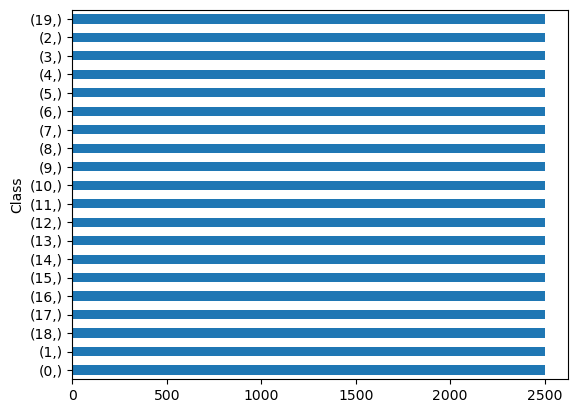

In [12]:
# Проверим баланс между группами в выборке
# Как можно заметить, все группы представлены в датасете в одинаковом количестве

y_train_bal = pd.DataFrame(y_train, columns=['Class'])
y_train_bal.value_counts().plot.barh()

In [13]:
# Отберем для исследования только две группы изображений
# - рыбы (классы 6-10) (группа 1 согласно массиву данных)
# - цветы (классы 11-15) (группа 2 согласно массиву данных)

# ВЫДЕЛЯЕМ ГРУППЫ ИЗ ТРЕНИРОВОЧНОГО НАБОРА ДАННЫХ
# Оформим все компоненты исходного словаря с данными в датафреймы
X_train_o = pd.DataFrame(data=X_train)
y_train_o = pd.DataFrame(y_train, columns=['Superclass'])
name_train_o = pd.DataFrame(np.array(data_train_dict[b'filenames']), columns=['File_name'])

# Объединим все датафремы в один
df_new_train = pd.concat([name_train_o, y_train_o, X_train_o], axis=1)

# Отсортируем данные по двум группам (рыбы и крупные хищники)
df_1_train = df_new_train[(df_new_train['Superclass'] == 1) | (df_new_train['Superclass'] == 2)]

# Разделяем данные на признаки и целевые метрики
df10_train = df_1_train[['File_name']]
df11_train = df_1_train[['Superclass']]
df12_train = df_1_train.iloc[:, 2:]


# ВЫДЕЛЯЕМ ГРУППЫ ИЗ ТЕСТОВОГО НАБОРА ДАННЫХ
# Оформим все компоненты исходного словаря с данными в датафреймы
X_test_o = pd.DataFrame(data=X_test)
y_test_o = pd.DataFrame(y_test, columns=['Superclass'])
name_test_o = pd.DataFrame(np.array(data_test_dict[b'filenames']), columns=['File_name'])

# Объединим все датафремы в один
df_new_test = pd.concat([name_test_o, y_test_o, X_test_o], axis=1)

# Отсортируем данные по двум группам (рыбы и крупные хищники)
df_1_test = df_new_test[(df_new_test['Superclass'] == 1) | (df_new_test['Superclass'] == 2)]

# Разделяем данные на признаки и целевые метрики
df10_test = df_1_test[['File_name']]
df11_test = df_1_test[['Superclass']]
df12_test = df_1_test.iloc[:, 2:]

In [14]:
# Определим итоговые наборы данных для дальнейшего обучения моделей
# Тренировочный набор данных
X1_train = df12_train #DataFrame
y1_train = df11_train #DataFrame
# Тестовый набор данных
X1_test = df12_test #DataFrame
y1_test = df11_test #DataFrame

In [17]:
# Выделим из тренировочного набора данных валидационную группу
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=42)

In [18]:
# Проверим сколько элементов включает в себя каждый набор данных
# Получается, что все исходные данные мы разделили в следующих пропорциях:
# тренировочные - 60%, валидационные - 20%, тестовые - 20%
X1_train.shape, X1_val.shape, X1_test.shape

((4000, 3072), (1000, 3072), (1000, 3072))

In [19]:
X101_train = X1_train.to_numpy ()
y101_train = y1_train.to_numpy ()
X101_val = X1_val.to_numpy ()
y101_val = y1_val.to_numpy ()
X101_test = X1_test.to_numpy ()
y101_test = y1_test.to_numpy ()

In [20]:
X101_train.shape

(4000, 3072)

In [21]:
X1_train.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
41803  102  130  107  100  126  129  108  123  115  100   65   64   82   57   
46553  169  157  127  116  120  132  105   99  117  112  114  129  114   99   
8075   107  113  119  109  101  114  120  154  204  225  245  240  235  247   
36467  204  188   59   35   40   43   51   50   71  181  206  207  215  149   
41510    1    1    1    1    1    1    1    1    1    1    1    2    4    2   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
41803   83  112  132  123   65   55  107  101   82  107  104  129  115   66   
46553  104  113  127  130  128  131  138  139  126  115  110  115  114  125   
8075   235  222  227  230  245  246  228  203  190  196  176  134  107   98   
36467   46   45   50  148  226  213  214  211  209  220  172   67   59  115   
41510    0    0    1    1    1    1    1    1    1    1    1    1    1    1   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
41803   77   94   86   98  103  114  114  122  135  137  121  124  135  127   
46553   98  101  105  103  118  131  114  108  118  112  108   98  107  125   
8075   119  139  125   99   97  113  116  107  115  144  125  131  196  223   
36467  199  218  214  209  193  194   74   45   39   42   54   54   49  147   
41510    1    1    1    1    1    1    1    1    1    1    1    1    1    1   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
41803   85   62   79   49   89  112  130  133   81   75   95   86   55   74   
46553  130  136  117  116  122  107  119  127  136  149  146  133  125  111   
8075   220  211  228  248  236  244  249  241  237  240  247  234  206  207   
36467  213  211  218  175   59   50   56  155  231  218  220  218  219  228   
41510    1    2    3    1    0    0    1    1    1    1    1    1    1    1   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
41803  104  117   96   66   95  123  112   80   92  111  129  139  127  135   
46553  104  107  143  170  138  115   88   90   99   96   81   91  125  116   
8075   192  167  124  105  104  116  130  112   86  113  114  113  126  155   
36467  223  175   82   63  153  224  215  210  176  204  161  141   80   48   
41510    1    1    1    1    1    1    1    1    1    1    1    1    1    1   

        70   71   72   73   74   75   76   77   78   79   80   81   82   83  \
41803  138  139  146  156  134   95   57   49  105  102  130  131  100   83   
46553  105  104  100  121  135  121  106  117  134  124  123  117  146  184   
8075   149  152  196  205  192  210  236  234  235  253  255  253  245  229   
36467   56   59   44   99  207  210  215  196   76   55   62  171  231  223   
41510    1    1    1    1    1    1    2    1    1    1    1    1    1    1   

        84   85   86   87   88   89   90   91   92   93   94   95   96   97  \
41803   72   87   68   69   97  108   86  111  107  117  102   64   95  120   
46553  185  161  138  120  100  101  189  218  182  136   99   76   93   98   
8075   242  246  228  220  207  186  153  135  108   89  124  106   99  121   
36467  227  224  223  228  236  233  115   72  147  221  211  205  185  201   
41510    1    1    1    1    1    1    1    1    1    1    1    1    1    1   

        98   99  100  101  102  103  104  105  106  107  108  109  110  111  \
41803  138  152  127  134  144  131  148  148  150  114   60   72   98   85   
46553   87  102  148  160  149  125  108  119  124  116  105  116  135  127   
8075   121  128  133  162  178  183  201  200  204  229  244  243  246  252   
36467  202  204  183  147  120   64   44   67  184  210  211  208  100   55   
41510    1    1    1    1    1    1    1    1    1    1    1    1    3    4   

       112  113  114  115  116  117  118  119  120  121  122  123  124  125  \
41803  108  118  103   84   58   76   99   73  102  116   87  112  107   85   
46553  132  148  175  196  202  194  172  132  103 

In [22]:
X1_test.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
5   168  166  156  149  143  138  130  123  117  109  102   97   95   67   59   
16   20   23   23   22   22   19   16   22   27   20   22   21   21   24   23   
18   30   80  120  111   98   97   95  182  196  145  100   85   92   99  105   
20    1    1    1    1    1    1    0    0    0    0    0    0    0    0    0   
29  255  255  255  255  255  255  255  255  255  255  255  255  253  255  255   

     15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
5    59   60   61   68  112  153  148  147  145  145  106   51   55   71   79   
16   19   21   21   20   17   18   36   44   25   14   14    8   30   47   20   
18  116  101  107  149  149  115   82   78   85  114  105   87   68   57   51   
20    0    0    6    3    0    0    0    2    1    1    1    1    1    1    1   
29  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

     30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
5    70   64  157  159  151  144  142  133  126  118  113  107  102  102   90   
16   22   19   21   21   21   22   24   21   17   27   51   26   20   27   19   
18   38   49   52   37   87  120   99  127   96  163  151  108  100  100  112   
20    1    1    1    1    1    0    0    1    2   29   41   32   54   41   22   
29  255  255  252  255  254  254  254  253  251  249  248  250  253  252  235   

     45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
5    64   59   59   61   64  106  152  151  144  143  142  141   94   51   52   
16   12   36   55   29   17   17   18   26   38   49   62   22   17    8   77   
18  137  181  185  132  106  133  149  124   94   91  105  132  107   97   75   
20   22   32   52   96  132  117   71   62   46    3    0    2    1    1    1   
29  224  213  188  207  235  249  249  245  244  248  253  254  254  254  254   

     60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
5    68   88   73   64  150  151  150  142  142  133  122  115  110  105  101   
16  122   37   19   14   21   21   23   27   27   24   16   39  148   79   18   
18   40   42   44   50  117   64   43   82  116  141  106  132  118  104  108   
20    1    1    1    1    1    1    1    0    0    2    9  110  174  169  197   
29  254  254  255  252  253  255  255  255  255  250  245  255  247  220  202   

     75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
5   103   85   65   63   62   66  102  142  151  145  138  140  144  139   79   
16   32   19    8   71  125   59   28   14   20   33   41   98  170   69   18   
18  119  148  177  206  221  184  149  150  147   99   98  142  195  184  120   
20  187  158  160  185  201  227  231  222  216  214  185   74   15    2    1   
29  168  137  132  130  130  144  165  204  225  228  250  254  253  254  255   

     90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  \
5    51   49   62   95   74   66  141  144  147  143  135  131  121  109  103   
16   56  183  167   51   23   15   19   21   27   50   48   25   20   59  207   
18   95   69   20   22   37   57   95   71   31   27   91  149  129  108  111   
20    1    1    1    1    1    1    1    1    1    0    1    1   23  157  237   
29  255  255  255  255  255  253  253  254  248  248  251  236  236  234  212   

    105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
5   101  100  104   80   66   66   72  105  137  142  144  135  135  140  148   
16  180   49   29   26   55  151  187  177  136   46   21   26   92  194  218   
18  108  111  142  183  202  225  231  238  226  209  192  142  153  218  253   
20  239  241  239  240  246  250  241  240  237  235  247  245  236  212  100   
29  197  155  104   91   95   98  116  156  162  146  143  131  161  218  255   

    120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
5   126   64   54   49   51  

In [23]:
y1_train.head()

,Superclass
41803,1
46553,1
8075,2
36467,2
41510,1


In [24]:
y1_test.head()

,Superclass
5,2
16,2
18,2
20,2
29,2


## 2.2 Преобразование данных

В качестве данных в нашу модель будут подаваться следующие характеристики:  
1) Количество пикселей - 32х32, итого 1024 пикселей.
2) Интенсивность цвета в каждом из пикселей.

In [25]:
# Учитывая, что входными параметрами цветных изображений являются пиксели в достаточно широком диапазоне,
# целесообразно нормализовать данные, разделив все значения на 255
# Для этого нам сначала нужно перевести данные в формат с плавающей запятой,
# поскольку в настоящее время они являются целыми числами.
X1_train = X1_train.astype('float32')
X1_test = X1_test.astype('float32')

In [26]:
X1_train.head()

0       1       2       3       4       5       6       7       8  \
41803 102.000 130.000 107.000 100.000 126.000 129.000 108.000 123.000 115.000   
46553 169.000 157.000 127.000 116.000 120.000 132.000 105.000  99.000 117.000   
8075  107.000 113.000 119.000 109.000 101.000 114.000 120.000 154.000 204.000   
36467 204.000 188.000  59.000  35.000  40.000  43.000  51.000  50.000  71.000   
41510   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   

            9      10      11      12      13      14      15      16      17  \
41803 100.000  65.000  64.000  82.000  57.000  83.000 112.000 132.000 123.000   
46553 112.000 114.000 129.000 114.000  99.000 104.000 113.000 127.000 130.000   
8075  225.000 245.000 240.000 235.000 247.000 235.000 222.000 227.000 230.000   
36467 181.000 206.000 207.000 215.000 149.000  46.000  45.000  50.000 148.000   
41510   1.000   1.000   2.000   4.000   2.000   0.000   0.000   1.000   1.000   

           18      19      20      21      22      23      24      25      26  \
41803  65.000  55.000 107.000 101.000  82.000 107.000 104.000 129.000 115.000   
46553 128.000 131.000 138.000 139.000 126.000 115.000 110.000 115.000 114.000   
8075  245.000 246.000 228.000 203.000 190.000 196.000 176.000 134.000 107.000   
36467 226.000 213.000 214.000 211.000 209.000 220.000 172.000  67.000  59.000   
41510   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   

           27      28      29      30      31      32      33      34      35  \
41803  66.000  77.000  94.000  86.000  98.000 103.000 114.000 114.000 122.000   
46553 125.000  98.000 101.000 105.000 103.000 118.000 131.000 114.000 108.000   
8075   98.000 119.000 139.000 125.000  99.000  97.000 113.000 116.000 107.000   
36467 115.000 199.000 218.000 214.000 209.000 193.000 194.000  74.000  45.000   
41510   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   

           36      37      38      39      40      41      42      43      44  \
41803 135.000 137.000 121.000 124.000 135.000 127.000  85.000  62.000  79.000   
46553 118.000 112.000 108.000  98.000 107.000 125.000 130.000 136.000 117.000   
8075  115.000 144.000 125.000 131.000 196.000 223.000 220.000 211.000 228.000   
36467  39.000  42.000  54.000  54.000  49.000 147.000 213.000 211.000 218.000   
41510   1.000   1.000   1.000   1.000   1.000   1.000   1.000   2.000   3.000   

           45      46      47      48      49      50      51      52      53  \
41803  49.000  89.000 112.000 130.000 133.000  81.000  75.000  95.000  86.000   
46553 116.000 122.000 107.000 119.000 127.000 136.000 149.000 146.000 133.000   
8075  248.000 236.000 244.000 249.000 241.000 237.000 240.000 247.000 234.000   
36467 175.000  59.000  50.000  56.000 155.000 231.000 218.000 220.000 218.000   
41510   1.000   0.000   0.000   1.000   1.000   1.000   1.000   1.000   1.000   

           54      55      56      57      58      59      60      61      62  \
41803  55.000  74.000 104.000 117.000  96.000  66.000  95.000 123.000 112.000   
46553 125.000 111.000 104.000 107.000 143.000 170.000 138.000 115.000  88.000   
8075  206.000 207.000 192.000 167.000 124.000 105.000 104.000 116.000 130.000   
36467 219.000 228.000 223.000 175.000  82.000  63.000 153.000 224.000 215.000   
41510   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   

           63      64      65      66      67      68      69      70      71  \
41803  80.000  92.000 111.000 129.000 139.000 127.000 135.000 138.000 139.000   
46553  90.000  99.000  96.000  81.000  91.000 125.000 116.000 105.000 104.000   
8075  112.000  86.000 113.000 114.000 113.000 126.000 155.000 149.000 152.000   
36467 210.000 176.000 204.000 161.000 141.000  80.000  48.000  56.000  59.000   
41510   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   

           72      73      74      75      76      77      78      79      80  \
41803 146.000 156.000 134.000  95.0

In [27]:
# Нормализуем наши входные данные
X1_train = X1_train/255.0
X1_test = X1_test/255.0

In [28]:
X1_train.head()

0     1     2     3     4     5     6     7     8     9    10    11  \
41803 0.400 0.510 0.420 0.392 0.494 0.506 0.424 0.482 0.451 0.392 0.255 0.251   
46553 0.663 0.616 0.498 0.455 0.471 0.518 0.412 0.388 0.459 0.439 0.447 0.506   
8075  0.420 0.443 0.467 0.427 0.396 0.447 0.471 0.604 0.800 0.882 0.961 0.941   
36467 0.800 0.737 0.231 0.137 0.157 0.169 0.200 0.196 0.278 0.710 0.808 0.812   
41510 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.008   

         12    13    14    15    16    17    18    19    20    21    22    23  \
41803 0.322 0.224 0.325 0.439 0.518 0.482 0.255 0.216 0.420 0.396 0.322 0.420   
46553 0.447 0.388 0.408 0.443 0.498 0.510 0.502 0.514 0.541 0.545 0.494 0.451   
8075  0.922 0.969 0.922 0.871 0.890 0.902 0.961 0.965 0.894 0.796 0.745 0.769   
36467 0.843 0.584 0.180 0.176 0.196 0.580 0.886 0.835 0.839 0.827 0.820 0.863   
41510 0.016 0.008 0.000 0.000 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004   

         24    25    26    27    28    29    30    31    32    33    34    35  \
41803 0.408 0.506 0.451 0.259 0.302 0.369 0.337 0.384 0.404 0.447 0.447 0.478   
46553 0.431 0.451 0.447 0.490 0.384 0.396 0.412 0.404 0.463 0.514 0.447 0.424   
8075  0.690 0.525 0.420 0.384 0.467 0.545 0.490 0.388 0.380 0.443 0.455 0.420   
36467 0.675 0.263 0.231 0.451 0.780 0.855 0.839 0.820 0.757 0.761 0.290 0.176   
41510 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004   

         36    37    38    39    40    41    42    43    44    45    46    47  \
41803 0.529 0.537 0.475 0.486 0.529 0.498 0.333 0.243 0.310 0.192 0.349 0.439   
46553 0.463 0.439 0.424 0.384 0.420 0.490 0.510 0.533 0.459 0.455 0.478 0.420   
8075  0.451 0.565 0.490 0.514 0.769 0.875 0.863 0.827 0.894 0.973 0.925 0.957   
36467 0.153 0.165 0.212 0.212 0.192 0.576 0.835 0.827 0.855 0.686 0.231 0.196   
41510 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.008 0.012 0.004 0.000 0.000   

         48    49    50    51    52    53    54    55    56    57    58    59  \
41803 0.510 0.522 0.318 0.294 0.373 0.337 0.216 0.290 0.408 0.459 0.376 0.259   
46553 0.467 0.498 0.533 0.584 0.573 0.522 0.490 0.435 0.408 0.420 0.561 0.667   
8075  0.976 0.945 0.929 0.941 0.969 0.918 0.808 0.812 0.753 0.655 0.486 0.412   
36467 0.220 0.608 0.906 0.855 0.863 0.855 0.859 0.894 0.875 0.686 0.322 0.247   
41510 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004   

         60    61    62    63    64    65    66    67    68    69    70    71  \
41803 0.373 0.482 0.439 0.314 0.361 0.435 0.506 0.545 0.498 0.529 0.541 0.545   
46553 0.541 0.451 0.345 0.353 0.388 0.376 0.318 0.357 0.490 0.455 0.412 0.408   
8075  0.408 0.455 0.510 0.439 0.337 0.443 0.447 0.443 0.494 0.608 0.584 0.596   
36467 0.600 0.878 0.843 0.824 0.690 0.800 0.631 0.553 0.314 0.188 0.220 0.231   
41510 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004   

         72    73    74    75    76    77    78    79    80    81    82    83  \
41803 0.573 0.612 0.525 0.373 0.224 0.192 0.412 0.400 0.510 0.514 0.392 0.325   
46553 0.392 0.475 0.529 0.475 0.416 0.459 0.525 0.486 0.482 0.459 0.573 0.722   
8075  0.769 0.804 0.753 0.824 0.925 0.918 0.922 0.992 1.000 0.992 0.961 0.898   
36467 0.173 0.388 0.812 0.824 0.843 0.769 0.298 0.216 0.243 0.671 0.906 0.875   
41510 0.004 0.004 0.004 0.004 0.008 0.004 0.004 0.004 0.004 0.004 0.004 0.004   

         84    85    86    87    88    89    90    91    92    93    94    95  \
41803 0.282 0.341 0.267 0.271 0.380 0.424 0.337 0.435 0.420 0.459 0.400 0.251   
46553 0.725 0.631 0.541 0.471 0.392 0.396 0.741 0.855 0.714 0.533 0.388 0.298   
8075  0.949 0.965 0.894 0.863 0.812 0.729 0.600 0.529 0.424 0.349 0.486 0.416   
36467 0.890 0.878 0.875 0.894 0.925 0.914 0.451 0.282 0.576 0.867 0.827 0.804   
41510 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004   

         96    97    98    99   100   101   102   103   104   105   106   107  \
41803 0.373 0.471 0.541 0.596 0.4

## 2.3 Визуализация

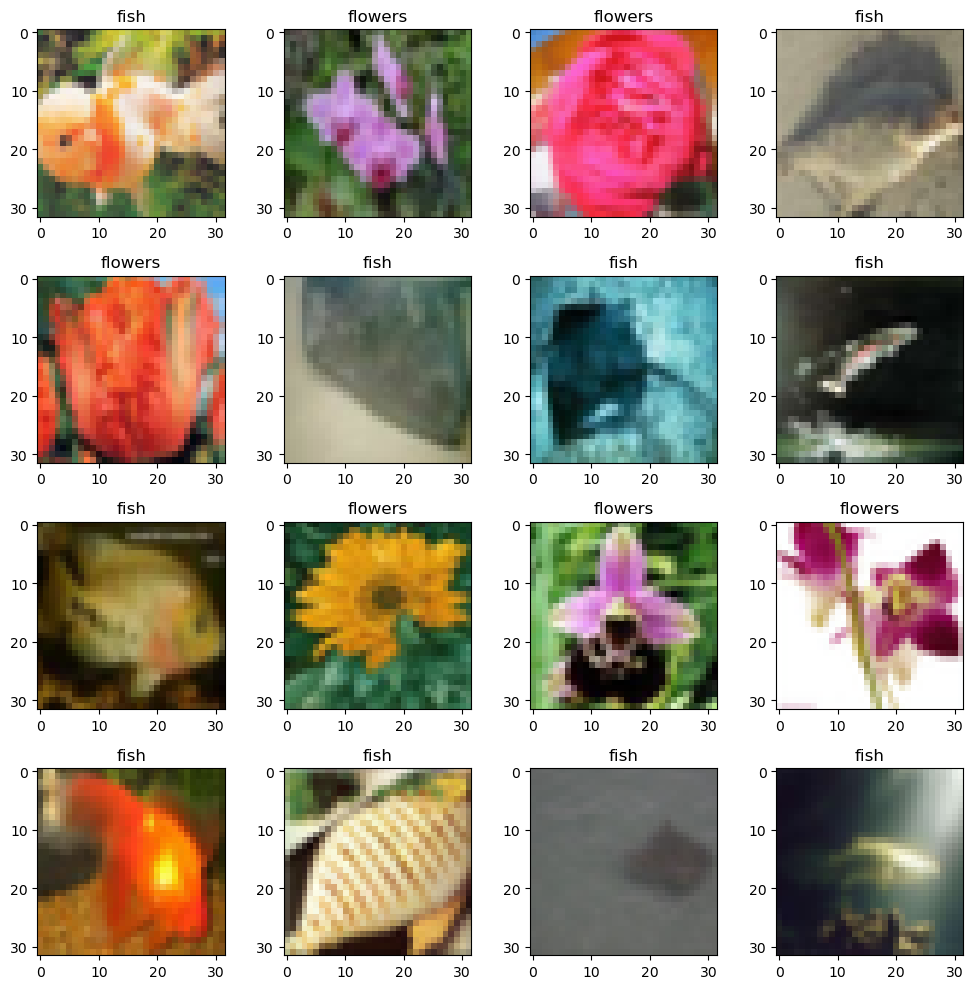

In [29]:
# Назначаем количество групп (superclasses)
nclass = 20
# Приведем значения групп (superclasses) к двоичной классификации
# Используем команду numpy.eye, которая возвращает двумерный массив с единицами по диагонали
# и нулями в остальных значениях матрицы.
y1_train_cat = np.eye(nclass)[y1_train]

# Переведем также обратно данные из датафрейма в массив
X1_train_arr = X1_train.to_numpy ()
X1_test_arr = X1_test.to_numpy ()

# И переведем данные в формат (32, 32, 3)
X1_train_arr = X1_train_arr.reshape(len(X1_train_arr), 3, 32, 32)
X1_test_arr = X1_test_arr.reshape(len(X1_test_arr), 3, 32, 32)

X1_train_arr = X1_train_arr.transpose(0, 2, 3, 1)
X1_test_arr = X1_test_arr.transpose(0, 2, 3, 1)


fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4*4):
    rand = random.randint(0, len(X1_train_arr))
    ax = axs[i // 4, i % 4]
    ax.imshow(X1_train_arr[rand])
    ax.set_title(meta[np.argmax(y1_train_cat[rand])].decode("utf-8"))

plt.tight_layout()
plt.show()

## 2.4 Прототип модели

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [31]:
# Инициализация моделей
models = {
    "Логистическая регрессия": LogisticRegression(max_iter=1000),
    "K-ближайших соседей": KNeighborsClassifier(),
    "Решающее дерево": DecisionTreeClassifier(),
    "Случайный лес": RandomForestClassifier(),
    "Градиентный бустинг": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LGBMClassifier": LGBMClassifier(),
    "CatBoostClassifier_default1000": CatBoostClassifier(verbose=0),
    "CatBoostClassifier_100": CatBoostClassifier(iterations=100, verbose=1)
}

In [32]:
from sklearn.preprocessing import LabelEncoder

# Для использования модели "XGBClassifier" переведем значения групп к бинарным значениям 0 и 1

le = LabelEncoder()
y1_train = le.fit_transform(y1_train.values.ravel())   #.values.ravel(), если DataFrame     .ravel(), если array
y1_test = le.fit_transform(y1_test.values.ravel())

In [33]:
# Начинаем обучение модели, применив только метод главных компонентов РСА, для снижения влияния мультиколлинеарности

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Для хранения результатов
results = {}

# Обучение моделей и сохранение обученных конвейеров
trained_pipelines_1 = {}

for name, model in models.items():
    pipeline_1 = make_pipeline(model)
    pipeline_1.fit(X1_train, y1_train.ravel()) # Обучение модели на обучающем наборе данных

    y1_pred = pipeline_1.predict(X1_test) # Предсказание классов на тестовом наборе данных

    accuracy = round(accuracy_score(y1_test, y1_pred), 5)
    precision = precision_score(y1_test, y1_pred, average='binary')
    recall = recall_score(y1_test, y1_pred, average='binary')
    f1 = f1_score(y1_test, y1_pred, average='binary')
    roc_auc = roc_auc_score(y1_test, y1_pred)


    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "roc_auc": roc_auc
    }

    trained_pipelines_1[name] = pipeline_1  # Сохраняем обученный конвейер
    print(f"{name} accuracy: {accuracy}")
    print(f"{name} precision: {precision}")
    print(f"{name} recall: {recall}")
    print(f"{name} f1: {f1}")
    print(f"{name} roc_auc: {roc_auc}")
    print()

results_df = pd.DataFrame.from_dict(results, orient='index')
display(results_df.sort_values(['Accuracy', 'F1 Score'], ascending=False))

Логистическая регрессия accuracy: 0.802
Логистическая регрессия precision: 0.8106995884773662
Логистическая регрессия recall: 0.788
Логистическая регрессия f1: 0.7991886409736308
Логистическая регрессия roc_auc: 0.802

K-ближайших соседей accuracy: 0.736
K-ближайших соседей precision: 0.9154929577464789
K-ближайших соседей recall: 0.52
K-ближайших соседей f1: 0.6632653061224489
K-ближайших соседей roc_auc: 0.736

Решающее дерево accuracy: 0.773
Решающее дерево precision: 0.7724550898203593
Решающее дерево recall: 0.774
Решающее дерево f1: 0.7732267732267732
Решающее дерево roc_auc: 0.773

Случайный лес accuracy: 0.843
Случайный лес precision: 0.8356164383561644
Случайный лес recall: 0.854
Случайный лес f1: 0.8447082096933729
Случайный лес roc_auc: 0.843

Градиентный бустинг accuracy: 0.859
Градиентный бустинг precision: 0.8526522593320236
Градиентный бустинг recall: 0.868
Градиентный бустинг f1: 0.8602576808721506
Градиентный бустинг roc_auc: 0.859

XGBClassifier accuracy: 0.871
XGBCla

,Accuracy,Precision,Recall,F1 Score,roc_auc
CatBoostClassifier_default1000,0.878,0.878,0.878,0.878,0.878
XGBClassifier,0.871,0.866,0.878,0.872,0.871
CatBoostClassifier_100,0.867,0.868,0.866,0.867,0.867
LGBMClassifier,0.864,0.853,0.880,0.866,0.864
Градиентный бустинг,0.859,0.853,0.868,0.860,0.859
Случайный лес,0.843,0.836,0.854,0.845,0.843
Логистическая регрессия,0.802,0.811,0.788,0.799,0.802
Решающее дерево,0.773,0.772,0.774,0.773,0.773
K-ближайших соседей,0.736,0.915,0.520,0.663,0.736


# 3 Настройка модели и валидация

## 3.1 Кросс-валидация

In [35]:
# Кросс-валидация - разбивка на k частей (в данном случае 5 частей).
# На четырех частях будет производится обучение модели, а последняя часть будет использоваться для тестирования.
# Кросс-валидация будет проходить только на тренировочных данных

rf = CatBoostClassifier(iterations=100, verbose=1)

scores = cross_val_score(rf, X1_train, y1_train, cv=5)


Learning rate set to 0.139841
0:	learn: 0.6343675	total: 1.47s	remaining: 2m 25s
1:	learn: 0.5863835	total: 3.25s	remaining: 2m 39s
2:	learn: 0.5458949	total: 4.52s	remaining: 2m 26s
3:	learn: 0.5160129	total: 5.77s	remaining: 2m 18s
4:	learn: 0.4925581	total: 7.09s	remaining: 2m 14s
5:	learn: 0.4705653	total: 8.51s	remaining: 2m 13s
6:	learn: 0.4536337	total: 10s	remaining: 2m 13s
7:	learn: 0.4387965	total: 11.4s	remaining: 2m 10s
8:	learn: 0.4224174	total: 12.7s	remaining: 2m 8s
9:	learn: 0.4090775	total: 14s	remaining: 2m 6s
10:	learn: 0.3992025	total: 15.3s	remaining: 2m 4s
11:	learn: 0.3885247	total: 16.8s	remaining: 2m 3s
12:	learn: 0.3789373	total: 18.5s	remaining: 2m 3s
13:	learn: 0.3721905	total: 19.7s	remaining: 2m 1s
14:	learn: 0.3643743	total: 20.9s	remaining: 1m 58s
15:	learn: 0.3587197	total: 22.8s	remaining: 1m 59s
16:	learn: 0.3511152	total: 24.2s	remaining: 1m 57s
17:	learn: 0.3459510	total: 25.5s	remaining: 1m 56s
18:	learn: 0.3379819	total: 27s	remaining: 1m 54s
19:	

58:	learn: 0.1948662	total: 2m 34s	remaining: 1m 47s
59:	learn: 0.1919830	total: 2m 36s	remaining: 1m 44s
60:	learn: 0.1885947	total: 2m 38s	remaining: 1m 41s
61:	learn: 0.1837234	total: 2m 41s	remaining: 1m 38s
62:	learn: 0.1802529	total: 2m 43s	remaining: 1m 35s
63:	learn: 0.1780367	total: 2m 45s	remaining: 1m 32s
64:	learn: 0.1763612	total: 2m 47s	remaining: 1m 30s
65:	learn: 0.1730998	total: 2m 48s	remaining: 1m 27s
66:	learn: 0.1709919	total: 2m 51s	remaining: 1m 24s
67:	learn: 0.1679942	total: 2m 52s	remaining: 1m 21s
68:	learn: 0.1665022	total: 2m 54s	remaining: 1m 18s
69:	learn: 0.1646712	total: 2m 56s	remaining: 1m 15s
70:	learn: 0.1615265	total: 2m 58s	remaining: 1m 12s
71:	learn: 0.1585653	total: 3m	remaining: 1m 10s
72:	learn: 0.1568010	total: 3m 1s	remaining: 1m 7s
73:	learn: 0.1546979	total: 3m 3s	remaining: 1m 4s
74:	learn: 0.1514590	total: 3m 5s	remaining: 1m 1s
75:	learn: 0.1492967	total: 3m 6s	remaining: 58.9s
76:	learn: 0.1468683	total: 3m 8s	remaining: 56.3s
77:	lea

15:	learn: 0.3498779	total: 38.9s	remaining: 3m 24s
16:	learn: 0.3437857	total: 41.5s	remaining: 3m 22s
17:	learn: 0.3375016	total: 44.7s	remaining: 3m 23s
18:	learn: 0.3300563	total: 47.9s	remaining: 3m 24s
19:	learn: 0.3259167	total: 51s	remaining: 3m 23s
20:	learn: 0.3196472	total: 53.7s	remaining: 3m 21s
21:	learn: 0.3156127	total: 56.4s	remaining: 3m 19s
22:	learn: 0.3110565	total: 59.1s	remaining: 3m 17s
23:	learn: 0.3052748	total: 1m 1s	remaining: 3m 14s
24:	learn: 0.3004406	total: 1m 4s	remaining: 3m 12s
25:	learn: 0.2975205	total: 1m 6s	remaining: 3m 10s
26:	learn: 0.2928240	total: 1m 9s	remaining: 3m 9s
27:	learn: 0.2885866	total: 1m 13s	remaining: 3m 8s
28:	learn: 0.2851361	total: 1m 15s	remaining: 3m 5s
29:	learn: 0.2816266	total: 1m 18s	remaining: 3m 2s
30:	learn: 0.2776928	total: 1m 23s	remaining: 3m 5s
31:	learn: 0.2735239	total: 1m 25s	remaining: 3m 1s
32:	learn: 0.2702473	total: 1m 28s	remaining: 2m 58s
33:	learn: 0.2670732	total: 1m 32s	remaining: 2m 59s
34:	learn: 0.

72:	learn: 0.1481664	total: 3m 42s	remaining: 1m 22s
73:	learn: 0.1455699	total: 3m 45s	remaining: 1m 19s
74:	learn: 0.1436281	total: 3m 48s	remaining: 1m 16s
75:	learn: 0.1407425	total: 3m 52s	remaining: 1m 13s
76:	learn: 0.1377116	total: 3m 55s	remaining: 1m 10s
77:	learn: 0.1358550	total: 3m 57s	remaining: 1m 7s
78:	learn: 0.1348503	total: 4m 1s	remaining: 1m 4s
79:	learn: 0.1322921	total: 4m 3s	remaining: 1m
80:	learn: 0.1301453	total: 4m 6s	remaining: 57.8s
81:	learn: 0.1273797	total: 4m 8s	remaining: 54.6s
82:	learn: 0.1251682	total: 4m 12s	remaining: 51.7s
83:	learn: 0.1221097	total: 4m 15s	remaining: 48.6s
84:	learn: 0.1203737	total: 4m 18s	remaining: 45.5s
85:	learn: 0.1189270	total: 4m 21s	remaining: 42.6s
86:	learn: 0.1170076	total: 4m 26s	remaining: 39.8s
87:	learn: 0.1161221	total: 4m 29s	remaining: 36.8s
88:	learn: 0.1147391	total: 4m 33s	remaining: 33.8s
89:	learn: 0.1128468	total: 4m 37s	remaining: 30.8s
90:	learn: 0.1113778	total: 4m 41s	remaining: 27.8s
91:	learn: 0.1

In [36]:
scores

array([0.8625 , 0.84375, 0.8625 , 0.85625, 0.8525 ])

## 3.2 Настройка гиперпараметров

Определим основные гиперпараметры для модели CatBoostClassifier_100.  

1) iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None,..., max_depth=None, n_estimators=None.          
      
      
2) n_estimators=10, eta=0.03, max_depth=6, bootstrap_type=None, silent=True, allow_writing_files=False, random_seed=0, n_jobs=- 1, **kwargs

Можно выделить три основных метода настройки гиперпараметров:   
1) Ручной, путем добавления к модели;  
2) Поиск по сетке, при помощи GridSearchCV.  
3) Случайный поиск, при помощи RandomizedSearchCV.

In [ ]:
# Применим поиск по сетке с использованием метода GridSearchCV.

rf = CatBoostClassifier(iterations=100, verbose=1)

# Определяем Гиперпараметры для CatBoost модели
hyperparams = {
    #'n_estimators': [50, 100, 150], #количество деревьев
    'max_depth': [4, 6, 8]             #глубина каждого дерева
    # 'learning_rate': [0.1, 1.0]    #скорость обучения
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(X1_train, y1_train.ravel())

Learning rate set to 0.139841
0:	learn: 0.6384860	total: 463ms	remaining: 45.8s
1:	learn: 0.5965141	total: 899ms	remaining: 44.1s
2:	learn: 0.5637948	total: 1.33s	remaining: 43.1s
3:	learn: 0.5377797	total: 1.75s	remaining: 42.1s
4:	learn: 0.5181950	total: 2.16s	remaining: 41.1s
5:	learn: 0.5003636	total: 2.62s	remaining: 41.1s
6:	learn: 0.4830173	total: 3.26s	remaining: 43.4s
7:	learn: 0.4709705	total: 3.77s	remaining: 43.4s
8:	learn: 0.4602395	total: 4.38s	remaining: 44.3s
9:	learn: 0.4499361	total: 4.89s	remaining: 44s
10:	learn: 0.4403020	total: 5.36s	remaining: 43.4s
11:	learn: 0.4314700	total: 5.8s	remaining: 42.5s
12:	learn: 0.4249948	total: 6.23s	remaining: 41.7s
13:	learn: 0.4167133	total: 6.76s	remaining: 41.6s
14:	learn: 0.4101918	total: 7.2s	remaining: 40.8s
15:	learn: 0.4050330	total: 7.65s	remaining: 40.2s
16:	learn: 0.3992318	total: 8.09s	remaining: 39.5s
17:	learn: 0.3930513	total: 8.49s	remaining: 38.7s
18:	learn: 0.3887822	total: 8.91s	remaining: 38s
19:	learn: 0.3844

61:	learn: 0.2734689	total: 28.9s	remaining: 17.7s
62:	learn: 0.2719752	total: 29.4s	remaining: 17.3s
63:	learn: 0.2699447	total: 29.9s	remaining: 16.8s
64:	learn: 0.2676625	total: 30.3s	remaining: 16.3s
65:	learn: 0.2643414	total: 30.8s	remaining: 15.9s
66:	learn: 0.2614385	total: 31.3s	remaining: 15.4s
67:	learn: 0.2598560	total: 31.9s	remaining: 15s
68:	learn: 0.2586981	total: 32.4s	remaining: 14.5s
69:	learn: 0.2565209	total: 33.1s	remaining: 14.2s
70:	learn: 0.2536698	total: 33.6s	remaining: 13.7s
71:	learn: 0.2516538	total: 34.3s	remaining: 13.4s
72:	learn: 0.2496222	total: 34.9s	remaining: 12.9s
73:	learn: 0.2471262	total: 35.7s	remaining: 12.5s
74:	learn: 0.2453475	total: 36.3s	remaining: 12.1s
75:	learn: 0.2428396	total: 36.8s	remaining: 11.6s
76:	learn: 0.2418083	total: 37.3s	remaining: 11.2s
77:	learn: 0.2405595	total: 37.8s	remaining: 10.7s
78:	learn: 0.2381470	total: 38.3s	remaining: 10.2s
79:	learn: 0.2354654	total: 38.8s	remaining: 9.7s
80:	learn: 0.2336257	total: 39.3s	

22:	learn: 0.3667847	total: 15.9s	remaining: 53.3s
23:	learn: 0.3638023	total: 16.5s	remaining: 52.2s
24:	learn: 0.3608198	total: 17.1s	remaining: 51.4s
25:	learn: 0.3571575	total: 17.7s	remaining: 50.3s
26:	learn: 0.3525055	total: 18.6s	remaining: 50.3s
27:	learn: 0.3496151	total: 19.4s	remaining: 50s
28:	learn: 0.3469671	total: 20s	remaining: 49s
29:	learn: 0.3440102	total: 20.7s	remaining: 48.2s
30:	learn: 0.3406558	total: 21.3s	remaining: 47.4s
31:	learn: 0.3375745	total: 21.8s	remaining: 46.3s
32:	learn: 0.3351465	total: 22.3s	remaining: 45.3s
33:	learn: 0.3320478	total: 23.1s	remaining: 44.9s
34:	learn: 0.3293610	total: 23.7s	remaining: 44s
35:	learn: 0.3254117	total: 24.3s	remaining: 43.2s
36:	learn: 0.3239912	total: 25.1s	remaining: 42.7s
37:	learn: 0.3218235	total: 25.5s	remaining: 41.6s
38:	learn: 0.3202101	total: 26s	remaining: 40.6s
39:	learn: 0.3178731	total: 26.7s	remaining: 40s
40:	learn: 0.3165349	total: 27.6s	remaining: 39.7s
41:	learn: 0.3144232	total: 28.1s	remaining

84:	learn: 0.2109225	total: 51s	remaining: 8.99s
85:	learn: 0.2080789	total: 51.5s	remaining: 8.39s
86:	learn: 0.2064130	total: 52s	remaining: 7.78s
87:	learn: 0.2037278	total: 52.5s	remaining: 7.17s
88:	learn: 0.2016203	total: 53.1s	remaining: 6.56s
89:	learn: 0.1997908	total: 54.3s	remaining: 6.03s
90:	learn: 0.1982687	total: 54.7s	remaining: 5.41s
91:	learn: 0.1966253	total: 55.3s	remaining: 4.81s
92:	learn: 0.1944292	total: 55.7s	remaining: 4.2s
93:	learn: 0.1935093	total: 56.3s	remaining: 3.59s
94:	learn: 0.1910471	total: 57.3s	remaining: 3.02s
95:	learn: 0.1887617	total: 57.8s	remaining: 2.41s
96:	learn: 0.1875198	total: 58.5s	remaining: 1.81s
97:	learn: 0.1856023	total: 59.1s	remaining: 1.21s
98:	learn: 0.1833081	total: 59.8s	remaining: 604ms
99:	learn: 0.1825104	total: 1m	remaining: 0us
Learning rate set to 0.139841
0:	learn: 0.6343675	total: 2.01s	remaining: 3m 19s
1:	learn: 0.5863835	total: 3.74s	remaining: 3m 3s
2:	learn: 0.5458949	total: 5.18s	remaining: 2m 47s
3:	learn: 0.

43:	learn: 0.2367891	total: 1m 17s	remaining: 1m 38s
44:	learn: 0.2341837	total: 1m 18s	remaining: 1m 36s
45:	learn: 0.2316120	total: 1m 20s	remaining: 1m 34s
46:	learn: 0.2286958	total: 1m 22s	remaining: 1m 32s
47:	learn: 0.2258488	total: 1m 24s	remaining: 1m 31s
48:	learn: 0.2226744	total: 1m 26s	remaining: 1m 30s
49:	learn: 0.2203728	total: 1m 28s	remaining: 1m 28s
50:	learn: 0.2180132	total: 1m 30s	remaining: 1m 27s
51:	learn: 0.2151189	total: 1m 33s	remaining: 1m 26s
52:	learn: 0.2123902	total: 1m 35s	remaining: 1m 24s
53:	learn: 0.2087192	total: 1m 37s	remaining: 1m 22s
54:	learn: 0.2050587	total: 1m 38s	remaining: 1m 20s
55:	learn: 0.2024728	total: 1m 40s	remaining: 1m 18s
56:	learn: 0.1990434	total: 1m 41s	remaining: 1m 16s
57:	learn: 0.1967956	total: 1m 42s	remaining: 1m 14s
58:	learn: 0.1948662	total: 1m 44s	remaining: 1m 12s
59:	learn: 0.1919830	total: 1m 45s	remaining: 1m 10s
60:	learn: 0.1885947	total: 1m 47s	remaining: 1m 8s
61:	learn: 0.1837234	total: 1m 48s	remaining: 1

1:	learn: 0.5837243	total: 3.28s	remaining: 2m 40s
2:	learn: 0.5461237	total: 4.58s	remaining: 2m 28s
3:	learn: 0.5141910	total: 5.91s	remaining: 2m 21s
4:	learn: 0.4851945	total: 7.33s	remaining: 2m 19s
5:	learn: 0.4633333	total: 9.25s	remaining: 2m 24s
6:	learn: 0.4474463	total: 11.3s	remaining: 2m 30s
7:	learn: 0.4292776	total: 13.3s	remaining: 2m 32s
8:	learn: 0.4156441	total: 15.1s	remaining: 2m 32s
9:	learn: 0.4047893	total: 17.1s	remaining: 2m 34s
10:	learn: 0.3938297	total: 18.7s	remaining: 2m 31s
11:	learn: 0.3825106	total: 21s	remaining: 2m 34s
12:	learn: 0.3738890	total: 23s	remaining: 2m 33s
13:	learn: 0.3665977	total: 25.3s	remaining: 2m 35s
14:	learn: 0.3589731	total: 26.8s	remaining: 2m 31s
15:	learn: 0.3498779	total: 28.2s	remaining: 2m 27s
16:	learn: 0.3437857	total: 30s	remaining: 2m 26s
17:	learn: 0.3375016	total: 31.8s	remaining: 2m 24s
18:	learn: 0.3300563	total: 33.1s	remaining: 2m 21s
19:	learn: 0.3259167	total: 34.9s	remaining: 2m 19s
20:	learn: 0.3196472	total:

59:	learn: 0.1890112	total: 2m 2s	remaining: 1m 21s
60:	learn: 0.1856890	total: 2m 4s	remaining: 1m 19s
61:	learn: 0.1826590	total: 2m 7s	remaining: 1m 18s
62:	learn: 0.1796764	total: 2m 9s	remaining: 1m 15s
63:	learn: 0.1761375	total: 2m 11s	remaining: 1m 14s
64:	learn: 0.1728501	total: 2m 13s	remaining: 1m 11s
65:	learn: 0.1695415	total: 2m 15s	remaining: 1m 9s
66:	learn: 0.1660750	total: 2m 16s	remaining: 1m 7s
67:	learn: 0.1630295	total: 2m 19s	remaining: 1m 5s
68:	learn: 0.1599062	total: 2m 22s	remaining: 1m 3s
69:	learn: 0.1567053	total: 2m 25s	remaining: 1m 2s
70:	learn: 0.1531679	total: 2m 28s	remaining: 1m
71:	learn: 0.1509137	total: 2m 31s	remaining: 58.9s
72:	learn: 0.1481664	total: 2m 33s	remaining: 56.9s
73:	learn: 0.1455699	total: 2m 35s	remaining: 54.7s
74:	learn: 0.1436281	total: 2m 37s	remaining: 52.6s
75:	learn: 0.1407425	total: 2m 39s	remaining: 50.4s
76:	learn: 0.1377116	total: 2m 42s	remaining: 48.6s
77:	learn: 0.1358550	total: 2m 44s	remaining: 46.3s
78:	learn: 0.

In [ ]:
def results(results):
    print('Optimal Hyperparams: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))

In [ ]:
results(cross_val)

NameError: name 'cross_val' is not defined

In [ ]:
# # Выберем три модели с наибольшей точностью
# rf1 = CatBoostClassifier(n_estimators=100)
# rf1.fit(X1_train, y1_train.ravel())

# # rf2 = CatBoostClassifier('iterations'=100, 'depth'=6, 'learning_rate'=0.1)
# # rf2.fit(X1_train, y1_train.ravel())

# # rf3 = CatBoostClassifier('iterations'=100, 'depth'=6, 'learning_rate'=0.1)
# # rf3.fit(X1_train, y1_train.ravel())

## 3.3 Окончательная версия модели

In [ ]:
# for mdl in [rf1, rf2, rf3]:
#   y_pred = mdl.predict(X1_val)
#   accuracy = round(accuracy_score(y1_val, y1_pred), 3)
#   precision = round(precision_score(y1_val, y1_pred), 3)
#   recall = round(recall_score(y1_val, y1_pred), 3)

#   print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(mdl.max_depth,
#                                                                                                 mdl.n_estimators,
#                                                                                                 accuracy,
#                                                                                                 precision,
#                                                                                                 recall))


In [ ]:
# y1_pred = rf1.predict(X1_test)
# accuracy = round(accuracy_score(y1_test, y1_pred), 3)
# precision = round(precision_score(y1_test, y1_pred), 3)
# recall = round(recall_score(y1_test, y1_pred), 3)

# print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(rf1.max_depth,
#                                                                                                 rf1.n_estimators,
#                                                                                                 accuracy,
#                                                                                                 precision,
#                                                                                                 recall))